# Simulation 2.3- Analysing


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut


import gym
import ctfsql
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate as ev

## Defining the parameters of the simulations

In [23]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2
#Not good practice, but allows for plots.
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [24]:
env = gym.make('ctfsql-v0')
folder = ""
retest = False
#folder = "D:/Dropbox2/Dropbox/PhDSource/data/sql/"

## Reading the models

In [25]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(str(i) + "ignore_simul6*.zip"):
        print(folder + file[:-4])
        model = DQN.load(folder + file[:-4])
        dqn_models.append(model)
        print(model)
#dqn_models[i].save(str(i) + 'ignore_simul2_'+timestamp)


0ignore_simul6_20210225160300517748
1ignore_simul6_20210225164336887478
2ignore_simul6_20210225172319396466
3ignore_simul6_20210225212015284047
4ignore_simul6_20210225215922393762
5ignore_simul6_20210225223828728530
6ignore_simul6_20210225231656072778
7ignore_simul6_20210226095014203105
8ignore_simul6_20210226102800896293
9ignore_simul6_20210226110625059149


In [26]:
#import evaluate15 as ev2
#for i in range(n_simulations):
#    mean_reward, _, median_reward = ev2.evaluate_model_deterministic(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [27]:
#import evaluate15 as ev2
#for i in tqdm(range(n_simulations)):
#    mean_reward, _, median_reward = ev2.evaluate_model_nondeter(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [28]:
import evaluate17 as ev2
#for i in tqdm(range(n_simulations)):
reward = ev2.test_episodes(dqn_models[i], env, num_episodes=100)
num_steps = 10-np.array(reward)

j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 

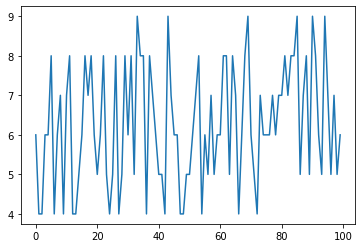

In [29]:
plt.plot(reward)

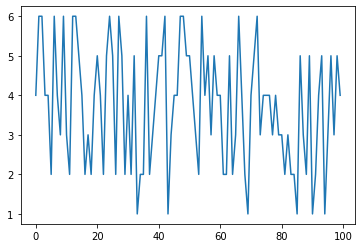

In [30]:
plt.plot(num_steps)

In [31]:
if(retest):
    rewards = []
    num_steps = []
    for i in tqdm(range(n_simulations)):
        rewards.append(ev2.test_episodes(dqn_models[i], env, num_episodes=1000))
        reward = rewards[-1]
        #We have to add one because the finding flag action is free.
        num_steps.append(10-np.array(reward) + 1)

In [32]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_simulation2_3_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_simulation2_3_num_steps.csv", num_steps)
else:
    num_steps = np.loadtxt("ignore_simulation2_3_num_steps.csv")

4.6751 5.0


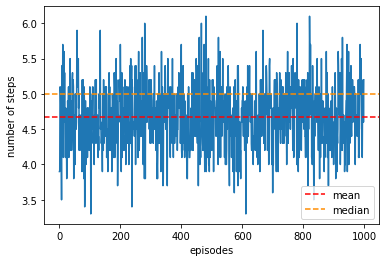

In [33]:
#plt.errorbar(range(n_episodes_test*10),np.mean(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
plt.plot(range(n_episodes_test*10),np.mean(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='darkorange',ls='--',label='median')
print(np.mean(num_steps), np.median(num_steps))
plt.legend()
plt.savefig("figures/sim2_3_test1.png")

In [34]:
num_steps = 10 - np.array(rewards) + 1

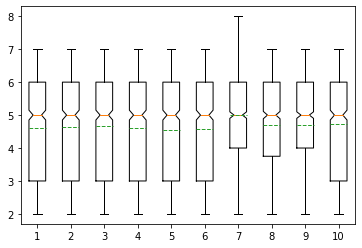

In [35]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_3_test2.png")

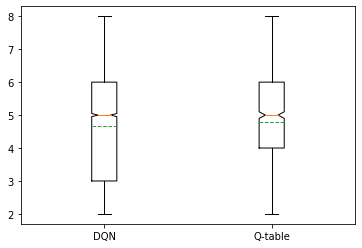

In [36]:
test_data = joblib.load('ignore_simul1_testdata_20210225215819702347.pkl')
plt.boxplot([num_steps.flatten(),test_data[:,0,:].flatten()], notch = True, 
            labels = ["DQN", "Q-table"], showmeans = True, meanline = True)
plt.savefig("figures/sim2_3_test3.png")